# 4.3 Bond behavior governed by plasticity
Define a bond-slip law governed by plasticity and loading history using unloading.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bmcs.bond_slip import BondSlipModel

## Isotropic hardening

### Construct an instance of bond-slip model and display its state

In [20]:
bs1 = BondSlipModel(mats_eval_type = 'elasto-plasticity')
bs1 # display the state of bond-slip model

### Define the parameters of the material model

In [21]:
bs1.mats_eval.trait_set(E_b = 20000.0,
                        K = 500.0,
                        gamma = 0.0,
                        tau_bar = 5.0)
bs1.mats_eval # display the values of material model parameters

### Define the loading scenario 
In first stetp - set the type of the load and in the second step define its parameters.

In [22]:
bs1.loading_scenario.trait_set(loading_type='cyclic',
                               amplitude_type='increasing',
                               loading_range='symmetric',
                               )
bs1.loading_scenario.trait_set(number_of_cycles=3,
                               maximum_loading=0.005,
                              unloading_ratio =0.0)

### Display the load as a function of pseudo time

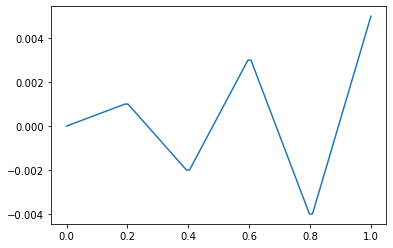

In [23]:
bs1.loading_scenario.plot(plt.axes())

### Run the calculation

In [24]:
bs1.sim.run()

### Access the results

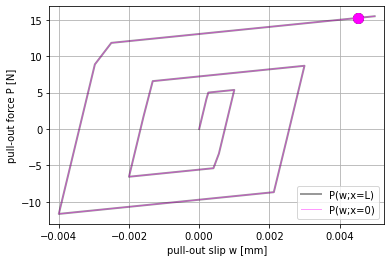

In [26]:
ax = plt.axes()
ax.grid(True)
bs1.hist.plot_Pw(ax,1)

## Kinematic hardening

In [27]:
bs2 = BondSlipModel(mats_eval_type = 'elasto-plasticity')
bs2.mats_eval.E_b = 20000.0
bs2.mats_eval.K = 0.0
bs2.mats_eval.gamma = -500.0
bs2.mats_eval.tau_bar = 5.0
bs2.mats_eval # check

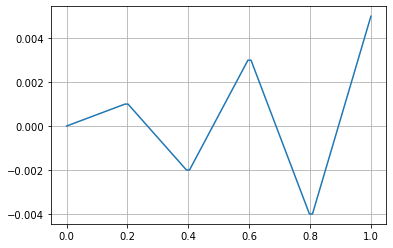

In [28]:
bs2.loading_scenario.trait_set(loading_type='cyclic',
                               amplitude_type='increasing',
                               loading_range='symmetric',
                               )
bs2.loading_scenario.trait_set(number_of_cycles=3,
                               maximum_loading=0.005,
                               unloading_ratio =0.0)
bs2.loading_scenario.plot(plt.axes()) # check
plt.grid()

In [29]:
bs2.sim.run()

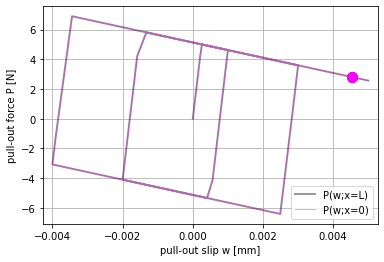

In [30]:
ax = plt.axes()
ax.grid(True)
bs2.hist.plot_Pw(ax,1)